In [5]:
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.meta import LeveragingBaggingClassifier
from sklearn.linear_model import SGDClassifier
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import FileStream
%matplotlib notebook

In [6]:
def demo_parameterized(h, filename="covtype.csv", show_plot=True, model_names=None):
    # Setup Stream
    stream = FileStream("https://raw.githubusercontent.com/scikit-multiflow/streaming-datasets/"
                        "master/" + filename)

    # For each classifier, e...
    pretrain = 100
    evaluator = EvaluatePrequential(pretrain_size=pretrain, output_file='test_parametrized.csv', max_samples=10000,
                                    batch_size=1, n_wait=500, show_plot=show_plot)
    evaluator.evaluate(stream=stream, model=h, model_names=model_names)

In [7]:
def demo():

    # The classifier we will use (other options: SAMKNNClassifier, LeveragingBaggingClassifier, SGD)
    h1 = [HoeffdingTreeClassifier(), SAMKNNClassifier(), LeveragingBaggingClassifier(random_state=1), SGDClassifier()]
    h2 = [HoeffdingTreeClassifier(), SAMKNNClassifier(), LeveragingBaggingClassifier(random_state=1), SGDClassifier()]
    h3 = [HoeffdingTreeClassifier(), SAMKNNClassifier(), LeveragingBaggingClassifier(random_state=1), SGDClassifier()]
    model_names = ['HT', 'SAMKNNClassifier', 'LBkNN', 'SGDC']

    # Demo 1 -- plot should not fail
    demo_parameterized(h1, model_names=model_names)

    # Demo 2 -- csv output should look nice
    demo_parameterized(h2, "sea_stream.csv", False, model_names)

    # Demo 3 -- should not give "'NoneType' object is not iterable" error
    demo_parameterized(h3, "covtype.csv", False, model_names)

<IPython.core.display.Javascript object>


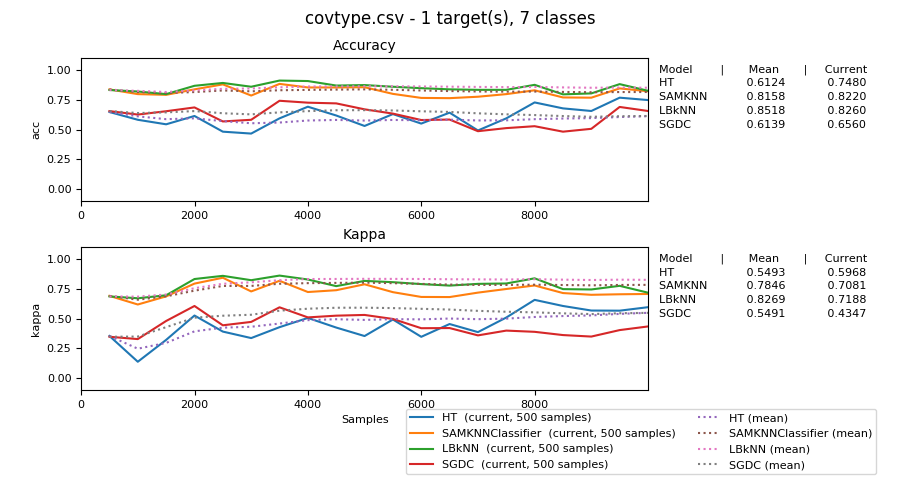

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 #################### [100%] [1032.60s]
Processed samples: 10000
Mean performance:
HT - Accuracy     : 0.6124
HT - Kappa        : 0.5493
SAMKNNClassifier - Accuracy     : 0.8158
SAMKNNClassifier - Kappa        : 0.7846
LBkNN - Accuracy     : 0.8518
LBkNN - Kappa        : 0.8269
SGDC - Accuracy     : 0.6139
SGDC - Kappa        : 0.5491
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 #################### [100%] [197.58s]
Processed samples: 10000
Mean performance:
HT - Accuracy     : 0.8683
HT - Kappa        : 0.7280
SAMKNNClassifier - Accuracy     : 0.8662
SAMKNNClassifier - Kappa        : 0.7240
LBkNN - Accuracy     : 0.7717
LBkNN - Kappa        : 0.5336
SGDC - Accuracy     : 0.7610
SGDC - Kappa        : 0.5119
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 #################### [100%] [984.69s]
Processed sa

In [8]:
demo()